Mount



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [25]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
warnings.filterwarnings(action='ignore')

LOAD DATASET

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


Preprocessing

In [7]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop Employee ID column
    df = df.drop('Employee ID', axis=1)
    
    # Drop rows with missing target values
    missing_target_rows = df.loc[df['Burn Rate'].isna(), :].index
    df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)
    
    # Fill remaining missing values with column means
    for column in ['Resource Allocation', 'Mental Fatigue Score']:
        df[column] = df[column].fillna(df[column].mean())
    
    # Extract date features
    df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
    df['Join Month'] = df['Date of Joining'].apply(lambda x: x.month)
    df['Join Day'] = df['Date of Joining'].apply(lambda x: x.day)
    df = df.drop('Date of Joining', axis=1)

    # Binary encoding
    df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
    df['Company Type'] = df['Company Type'].replace({'Product': 0, 'Service': 1})
    df['WFH Setup Available'] = df['WFH Setup Available'].replace({'No': 0, 'Yes': 1})
    
    # Split df into X and y
    y = df['Burn Rate']
    X = df.drop('Burn Rate', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [9]:
X_train

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Join Month,Join Day
8275,-0.954022,-1.379211,-1.087295,0.725025,0.768001,0.475128,0.433442,-0.649693
21284,1.048194,0.725052,-1.087295,1.604608,1.270205,1.131455,1.596251,-0.536187
16802,1.048194,0.725052,-1.087295,-0.154557,0.768001,0.420434,1.305549,0.371860
3271,1.048194,-1.379211,-1.087295,1.604608,2.274612,1.733089,0.142739,1.620424
5302,-0.954022,-1.379211,-1.087295,-0.154557,-0.236406,0.475128,0.724144,-0.422682
...,...,...,...,...,...,...,...,...
10955,-0.954022,0.725052,-1.087295,-0.154557,0.768001,0.803292,-1.020070,-1.444234
17289,-0.954022,0.725052,0.919713,0.725025,-0.236406,-0.509363,-0.147963,0.712377
5192,-0.954022,0.725052,0.919713,0.725025,0.265797,-1.165690,1.014847,0.031342
12172,1.048194,-1.379211,0.919713,-1.913723,-1.743017,-1.220384,0.433442,-1.671246


In [10]:
y_train

8275     0.61
21284    0.81
16802    0.62
3271     0.73
5302     0.43
         ... 
10955    0.58
17289    0.39
5192     0.24
12172    0.18
235      0.00
Name: Burn Rate, Length: 15138, dtype: float64

Training

In [35]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.


Results 

In [14]:
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

                     Linear Regression R^2 Score: 0.87075
 Linear Regression (L2 Regularization) R^2 Score: 0.87075
 Linear Regression (L1 Regularization) R^2 Score: -0.00001
Support Vector Machine (Linear Kernel) R^2 Score: 0.86724
   Support Vector Machine (RBF Kernel) R^2 Score: 0.88430


Calculate RMSE

In [24]:
# Evaluate model performance
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = model.score(X_test, y_test)
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

RMSE: 0.0674
R-squared: 0.8843


In [32]:
# Predict on new data
# For example, a new employee with the following features
new_data = pd.DataFrame({"Date of Joining": ['2010-01-01'],
                         "Gender": ["Female"],
                         "Company Type": ["Service"],
                         "WFH Setup Available": ["Yes"],
                         "Designation": [3.0],
                         "Resource Allocation": [6.0],
                         "Mental Fatigue Score": [7.5]})

In [34]:
# Scale numerical variables using min-max scaling
df = (df - df.min()) / (df.max() - df.min())
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df)
new_data = pd.get_dummies(new_data)
new_data = new_data.fillna(new_data.mean())
new_data = (new_data - df.min()) / (df.max() - df.min())

TypeError: ignored

In [33]:
# Predict burn out rate using the model
new_pred = model.predict(new_data)
print(f"Predicted burn out rate: {new_pred[0]:.4f}")

ValueError: ignored

Graph

In [36]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

In [43]:
# Check the shapes of X_train and y_train
print(X_train.shape)
print(y_train.shape)

(15138, 8)
(15138,)


In [48]:
X_test.shape

(6488, 8)

In [49]:
X_train.shape

(15138, 8)

In [50]:
y_train.shape

(15138,)

In [51]:
y_train[:5]

8275     0.61
21284    0.81
16802    0.62
3271     0.73
5302     0.43
Name: Burn Rate, dtype: float64

In [53]:
X_train[:5]

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Join Month,Join Day
8275,-0.954022,-1.379211,-1.087295,0.725025,0.768001,0.475128,0.433442,-0.649693
21284,1.048194,0.725052,-1.087295,1.604608,1.270205,1.131455,1.596251,-0.536187
16802,1.048194,0.725052,-1.087295,-0.154557,0.768001,0.420434,1.305549,0.371860
3271,1.048194,-1.379211,-1.087295,1.604608,2.274612,1.733089,0.142739,1.620424
5302,-0.954022,-1.379211,-1.087295,-0.154557,-0.236406,0.475128,0.724144,-0.422682


In [66]:
import seaborn as sns

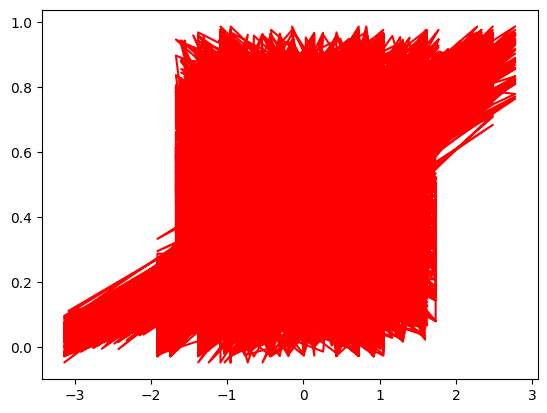

In [75]:

# Plot the regression line in red
plt.plot(X_test, y_pred, color='red', label='Regression line')

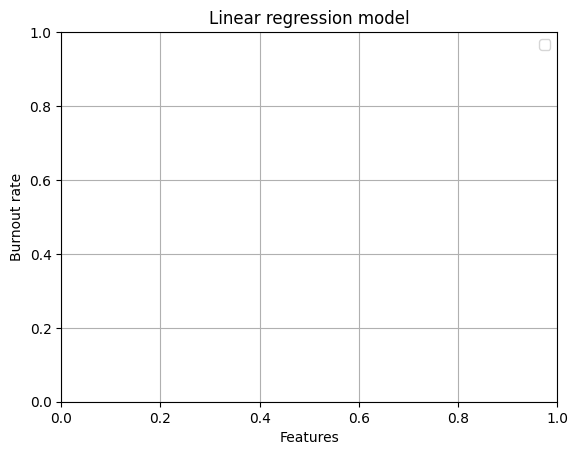

In [59]:
plt.xlabel('Features')
plt.ylabel('Burnout rate')
plt.title('Linear regression model')
plt.legend()
plt.grid()

# Show the graph
plt.show()